# Solvation
VeloxChem has two ways to compute the Gibbs energy of solvation - implicit CPCM or SMD and explicit solvation using alchemical free energy perturbation.

In [1]:
import veloxchem as vlx

In this example we will solvate a phenolate anion using both methods. First we define the molecule object and set the charge to -1.

In [2]:
molecule = vlx.Molecule.read_smiles('c1ccccc1[O-]')
molecule.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Implicit solvation
To compute the solvation free energy using CPCM we simply compute the gas phase energy first, then use ```.solvation_model = 'cpcm'``` on the scf driver, and then compute the scf again. The free energy of solvation will be the difference between the cpcm_results and scf_results.

#### CPCM

In [3]:
basis = vlx.MolecularBasis.read(molecule, 'def2-svp')
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.xcfun = "b3lyp"
scf_results = scf_drv.compute(molecule, basis)
scf_drv.solvation_model = 'cpcm'
cpcm_results = scf_drv.compute(molecule, basis)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

In [4]:
Gsolv = cpcm_results['scf_energy'] - scf_results['scf_energy']

print('Experimental solvation free energy:')
print('-72.5 kcal/ mol')
print(f"{-72.5*4.184:.1f} kJ/ mol")
print(" ")
print('CPCM solvation free energy:')
print(f"{Gsolv*627.5:.1f} kcal/mol")
print(f"{Gsolv*2625.5:.1f} kJ/mol")

Experimental solvation free energy:
-72.5 kcal/ mol
-303.3 kJ/ mol
 
CPCM solvation free energy:
-61.6 kcal/mol
-257.6 kJ/mol


#### SMD

In [ ]:
basis = vlx.MolecularBasis.read(molecule, 'def2-svp')
scf_drv = vlx.ScfRestrictedDriver()
scf_drv.xcfun = "b3lyp"
scf_results = scf_drv.compute(molecule, basis)
scf_drv.solvation_model = 'smd'
smd_results = scf_drv.compute(molecule, basis)

In [4]:
Gsolv = smd_results['scf_energy'] - scf_results['scf_energy']

print('Experimental solvation free energy:')
print('-72.5 kcal/ mol')
print(f"{-72.5*4.184:.1f} kJ/ mol")
print(" ")
print('SMD solvation free energy:')
print(f"{Gsolv*627.5:.1f} kcal/mol")
print(f"{Gsolv*2625.5:.1f} kJ/mol")

Experimental solvation free energy:
-72.5 kcal/ mol
-303.3 kJ/ mol
 
SMD solvation free energy:
-69.6 kcal/mol
-291.3 kJ/mol


### Explicit Solvation
To compute the solvation using alchemical free energy perturbation protocol you need the two lines below. This will generate a force field with RESP charges (HF/6-31G*), solvate it in a box with 1 nm padding and run every lamda for 0.1 ns.

To run the cells below remove the """ in the cells. These computations can be a bit slow so do not run them if you do not have a good GPU.

In [ ]:
"""
explicit_solvation = vlx.SolvationFepDriver()
explicit_solvation.num_steps = 50000
explicit_solvation.num_snapshots = 1000
explicit_solvation_result = explicit_solvation.compute(molecule)
"""

                                               VeloxChem Solvation Builder                                                
                                                                                                                          
* Info * Solvating the solute with cspce molecules                                                                        
* Info * Padding: 1.0 nm                                                                                                  
                                                                                                                          
* Info * NPT Equilibration of the box requested                                                                           
                                                                                                                          
* Info * The box size is: 2.50 x 2.50 x 2.50 nm^3                                                                         
* Info * The vol

max_delta = 4.393760e-11, tol = 1.000000e-12, maximum_iterations = 10000, iterations completed = 9999
Failed to reach a solution to within tolerance with adaptive: trying next method
No solution found to within tolerance.
The solution with the smallest gradient 9.096576e-13 norm is adaptive
Please exercise caution with this solution and consider alternative methods or a different tolerance.


Free energy for stage 4: 0.0001 +/- 0.0000 kJ/mol
Final free energy: -365.9122 kJ/mol


In [9]:
solvation = explicit_solvation_result['free_energy'] - molecule.get_charge()*57.7 #correction term added for the potential in taking the ion across the interface https://doi.org/10.1021/acs.jpclett.7b01125
print('Experimental solvation free energy: -72.5 kcal/mol')
print(f"FEP result: {solvation/4.184:.1f} kcal/mol")

Experimental solvation free energy: -72.5 kcal/mol
FEP result: -73.7 kcal/mol


### How large systems do we use solvation free energy for?

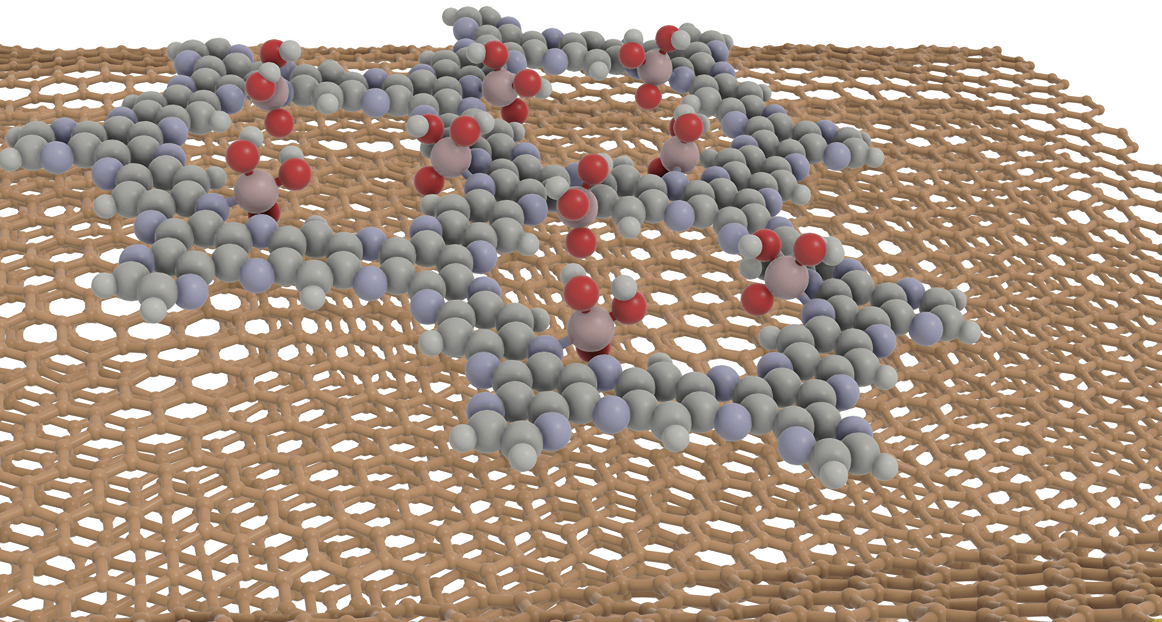